<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag.csv")
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am,next_month_spei01
0,287,201505,15.271,-17.068,297.249,291.684,304.108,292.141,0.000248,0.000000e+00,...,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753,-1.983540
1,287,201506,15.271,-17.068,298.479,292.966,307.924,293.551,0.000030,0.000000e+00,...,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415,-0.773948
2,287,201507,15.271,-17.068,300.038,296.358,304.813,295.583,0.039828,0.000000e+00,...,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645,1.125420
3,287,201508,15.271,-17.068,300.277,297.167,304.959,297.178,0.201599,8.638150e-08,...,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260,0.593335
4,287,201509,15.271,-17.068,300.453,296.962,304.370,297.498,0.118411,8.523460e-07,...,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879,0.325884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,387,202304,11.678,51.204,299.834,294.269,306.253,293.895,0.005088,1.009060e-07,...,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807,0.317675
83576,387,202305,11.678,51.204,301.408,294.354,307.231,295.266,0.019854,3.091570e-07,...,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549,0.585810
83577,387,202306,11.678,51.204,302.933,296.843,309.328,292.453,0.000158,0.000000e+00,...,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490,1.418990
83578,387,202307,11.678,51.204,304.032,299.200,309.950,290.167,0.000038,0.000000e+00,...,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758,0.518092


In [ ]:
dataset.describe()

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,8.358000e+04,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,418.813735,201906.427614,6.426204,18.674333,297.649914,288.751947,307.368306,283.618993,0.053403,0.000054,...,3420.290769,2134.155208,298.576399,2.584283e-05,-0.646818,-0.761360,2018.999282,6.499402,0.151643,-0.646973
std,242.096341,242.792918,17.759911,15.790527,5.733555,6.671234,5.693900,8.848290,0.088575,0.000232,...,2345.066013,1406.945576,5.686335,4.198437e-05,1.343397,1.285446,2.432968,3.389895,0.126393,1.344868
min,0.000000,201505.000000,-33.238000,-17.068000,272.097000,258.898000,281.999000,259.118000,0.000016,0.000000,...,489.180000,326.296000,277.836000,0.000000e+00,-5.000000,-5.000000,2015.000000,1.000000,0.020000,-5.000000
25%,208.000000,201705.000000,-6.288000,8.085000,294.404000,284.604000,303.519750,276.173000,0.000221,0.000000,...,1138.105000,857.004500,295.590000,5.410485e-08,-1.500755,-1.608122,2017.000000,4.000000,0.050233,-1.499347
50%,419.000000,201906.000000,9.881000,20.661000,298.138000,290.355000,307.035500,284.262000,0.006267,0.000000,...,2827.910000,1692.095000,299.064000,3.700365e-06,-0.672251,-0.850191,2019.000000,6.000000,0.107151,-0.671430
75%,628.000000,202107.000000,20.661000,29.644000,301.243000,293.962000,311.563000,291.767250,0.076323,0.000001,...,5490.260000,3268.610000,302.221000,3.568545e-05,0.246571,0.077590,2021.000000,9.000000,0.219935,0.247549
max,837.000000,202308.000000,36.831000,51.204000,313.569000,302.760000,322.431000,298.408000,1.148110,0.006530,...,8742.230000,6458.600000,313.910000,3.350020e-04,5.000000,5.000000,2023.000000,12.000000,0.668410,5.000000


In [ ]:
dataset.sum()

Unnamed: 0                                                                  35004452
Month                                                                    16875339220
Lat                                                                       537102.133
Lon                                                                      1560800.722
temperature_2m                                                          24877579.783
temperature_2m_min                                                      24133887.715
temperature_2m_max                                                      25689843.054
dewpoint_temperature_2m                                                 23704875.408
total_precipitation_sum                                                  4463.421947
total_precipitation_min                                                     4.536282
total_precipitation_max                                                   822.933829
u_component_of_wind_10m                                          

In [ ]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lat                                0
Lon                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
datetime                           0
year                               0
month2                             0
next_month_soil_moisture_am        0
n

In [ ]:
len(dataset)

83580

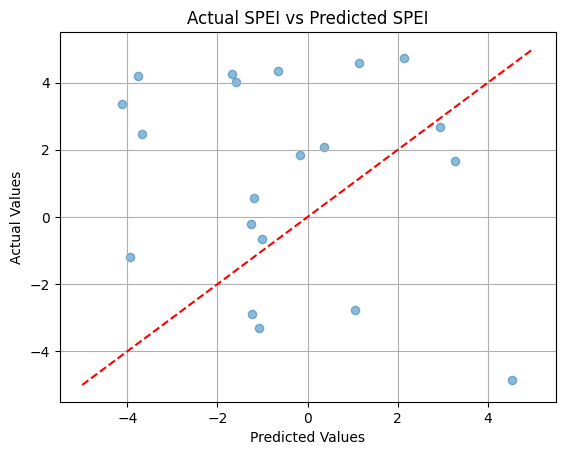

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Define the length of the arrays
array_length = 20

# Generate random values for actual and predicted arrays
random_array_actual = [random.uniform(-5, 5) for _ in range(array_length)]
random_array_predicted = [random.uniform(-5, 5) for _ in range(array_length)]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Scatter plot with translucent points
ax.scatter(random_array_predicted, random_array_actual, alpha=0.5, label='Data Points')

# Plot the y=x line
ax.plot([-5, 5], [-5, 5], color='red', linestyle='--', label='y=x')

# Set axis labels and a legend
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Actual SPEI vs Predicted SPEI')


# Show the plot
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the saved file
file_path = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult1.csv'  # Adjust the path as needed
df = pd.read_csv(file_path)
df2 = df[df['Predicted'] >= 0]
# Sample 100 points from the DataFrame
sampled_df = df2.sample(n=1000, random_state=42)  # Set random_state for reproducibility

plt.figure(figsize=(10, 6))
plt.scatter(sampled_df['Predicted'], sampled_df['Actual'], alpha=0.5)

# Add a 45-degree line (y = x)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='y=x')

plt.title('SPEI Predicted vs Actual Sampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.legend()
plt.grid(True)
plt.show()

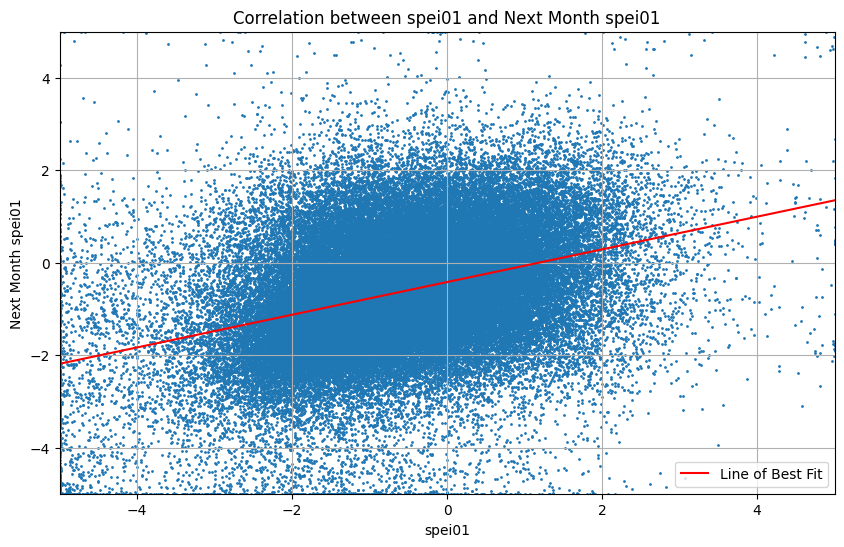

Correlation coefficient: 0.35338392328438434


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named dataset with columns "spei01" and "next_month_spei01"

# Plotting the correlation
plt.figure(figsize=(10, 6))
plt.scatter(dataset["spei01"], dataset["next_month_spei01"], s=1)
plt.title("Correlation between spei01 and Next Month spei01")
plt.xlabel("spei01")
plt.ylabel("Next Month spei01")
plt.grid(True)

spei01_range = dataset["spei01"].max() - dataset["spei01"].min()
next_month_spei01_range = dataset["next_month_spei01"].max() - dataset["next_month_spei01"].min()

plt.xlim(dataset["spei01"].min() - 0.1 * spei01_range + 1, dataset["spei01"].max() + 0.1 * spei01_range - 1)
plt.ylim(dataset["next_month_spei01"].min() - 0.1 * next_month_spei01_range + 1, dataset["next_month_spei01"].max() + 0.1 * next_month_spei01_range - 1)

# Adding a line of best fit
coefficients = np.polyfit(dataset["spei01"], dataset["next_month_spei01"], 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(dataset["spei01"].min(), dataset["spei01"].max(), 100)
plt.plot(x_axis, polynomial(x_axis), color='red', label='Line of Best Fit')  # line of best fit

# Adding a legend to indicate the line of best fit
plt.legend()

plt.show()
# Calculating the correlation
correlation = dataset["spei01"].corr(dataset["next_month_spei01"])
print("Correlation coefficient:", correlation)

In [ ]:
random_row = dataset.sample(n=1)

specific_lon = int(random_row["Lon"])
specific_lat = int(random_row["Lat"])

# Creating the subset
subset = dataset[(dataset["Lon"] == 36.831) & (dataset["Lat"] == -8.085)]

In [ ]:
subset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am,next_month_spei01
73191,642,201505,-8.085,36.831,295.696,289.719,300.931,291.859,0.108957,1.274730e-06,...,4279.45,296.083,6.552320e-06,0.069287,-0.686550,2015-05-01,2015,5,0.159638,-1.005330
73192,642,201506,-8.085,36.831,294.513,287.317,301.224,288.211,0.014878,0.000000e+00,...,3737.62,294.411,2.384580e-06,-1.005330,-0.685380,2015-06-01,2015,6,0.134587,-0.517985
73193,642,201507,-8.085,36.831,294.716,287.299,301.778,287.701,0.024312,7.622230e-07,...,2978.10,295.043,5.805900e-07,-0.517985,-0.362989,2015-07-01,2015,7,0.123465,-0.922291
73194,642,201508,-8.085,36.831,295.664,288.622,303.206,287.339,0.015016,1.278390e-06,...,2600.47,296.203,2.890230e-06,-0.922291,-1.220050,2015-08-01,2015,8,0.118243,-0.875232
73195,642,201509,-8.085,36.831,297.870,290.676,306.124,287.489,0.004741,0.000000e+00,...,2255.08,296.277,8.723770e-06,-0.875232,-1.071500,2015-09-01,2015,9,0.111872,-1.193010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73285,642,202304,-8.085,36.831,296.822,290.948,302.304,294.101,0.253453,6.015220e-05,...,4614.71,297.743,1.119660e-05,0.544009,0.299292,2023-04-01,2023,4,0.277264,-0.486147
73286,642,202305,-8.085,36.831,296.075,290.476,301.835,292.183,0.045775,1.061620e-06,...,4342.00,296.747,1.068140e-05,-0.486147,-0.061616,2023-05-01,2023,5,0.229759,0.419882
73287,642,202306,-8.085,36.831,295.247,287.573,301.975,289.038,0.023715,2.868990e-07,...,4203.96,295.213,1.554840e-06,0.419882,0.213119,2023-06-01,2023,6,0.155197,-1.199270
73288,642,202307,-8.085,36.831,295.161,287.877,302.975,286.922,0.013578,1.225220e-07,...,3497.51,296.407,1.788310e-06,-1.199270,-0.533952,2023-07-01,2023,7,0.159500,-1.010900


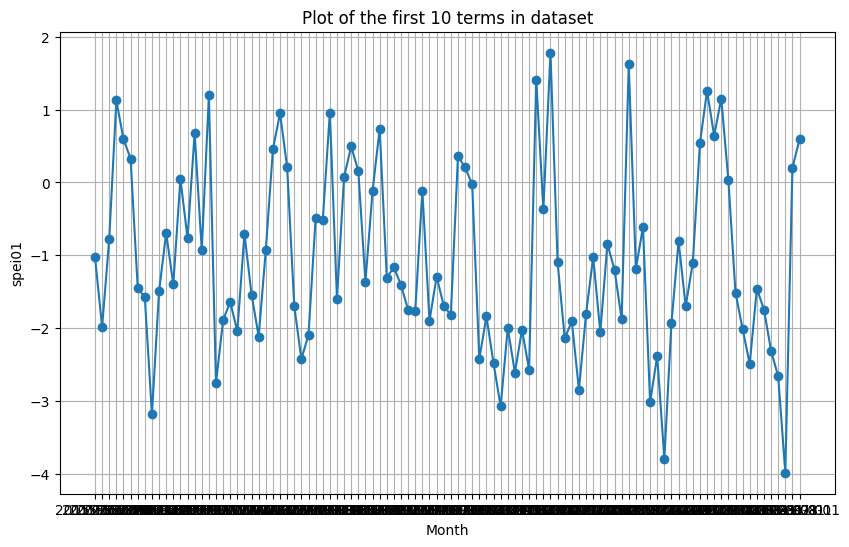

In [ ]:
#SPEI graph of first 10 months
plt.figure(figsize=(10, 6))
plt.plot(dataset['datetime'].iloc[:100], dataset['spei01'].iloc[:100], marker='o')
plt.title('Plot of the first 10 terms in dataset')
plt.xlabel('Month')
plt.ylabel('spei01')
plt.grid(True)
plt.show()

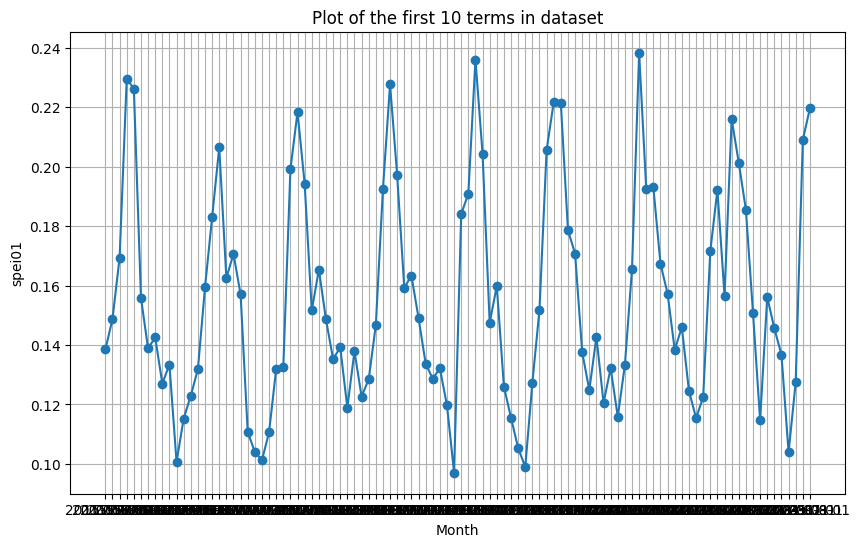

In [ ]:
#Soil Moisture graph of first 10 months
plt.figure(figsize=(10, 6))
plt.plot(dataset['datetime'].iloc[:100], dataset['soil_moisture_am'].iloc[:100], marker='o')
plt.title('Plot of the first 10 terms in dataset')
plt.xlabel('Month')
plt.ylabel('spei01')
plt.grid(True)
plt.show()

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Month', 'Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'datetime', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01'],
      dtype='object')

In [ ]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

dataset['monthly_datetime'] = dataset['datetime'].dt.to_period('M').dt.to_timestamp()

In [ ]:
dataset['monthly_datetime']

0       2015-05-01
1       2015-06-01
2       2015-07-01
3       2015-08-01
4       2015-09-01
           ...    
83575   2023-04-01
83576   2023-05-01
83577   2023-06-01
83578   2023-07-01
83579   2023-08-01
Name: monthly_datetime, Length: 83580, dtype: datetime64[ns]

In [ ]:
timeseries.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: soil_moisture_am, dtype: float64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

timeseries = pd.Series(dataset['soil_moisture_am'].iloc[:100], index=pd.to_datetime(dataset['monthly_datetime'].iloc[:100]))

# Perform seasonal decomposition
result = seasonal_decompose(timeseries, model='additive', period=12)  # period depends on expected seasonality

# Plot the decomposition
result.plot()
plt.show()

ValueError: This function does not handle missing values

<ipython-input-9-d021248850a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


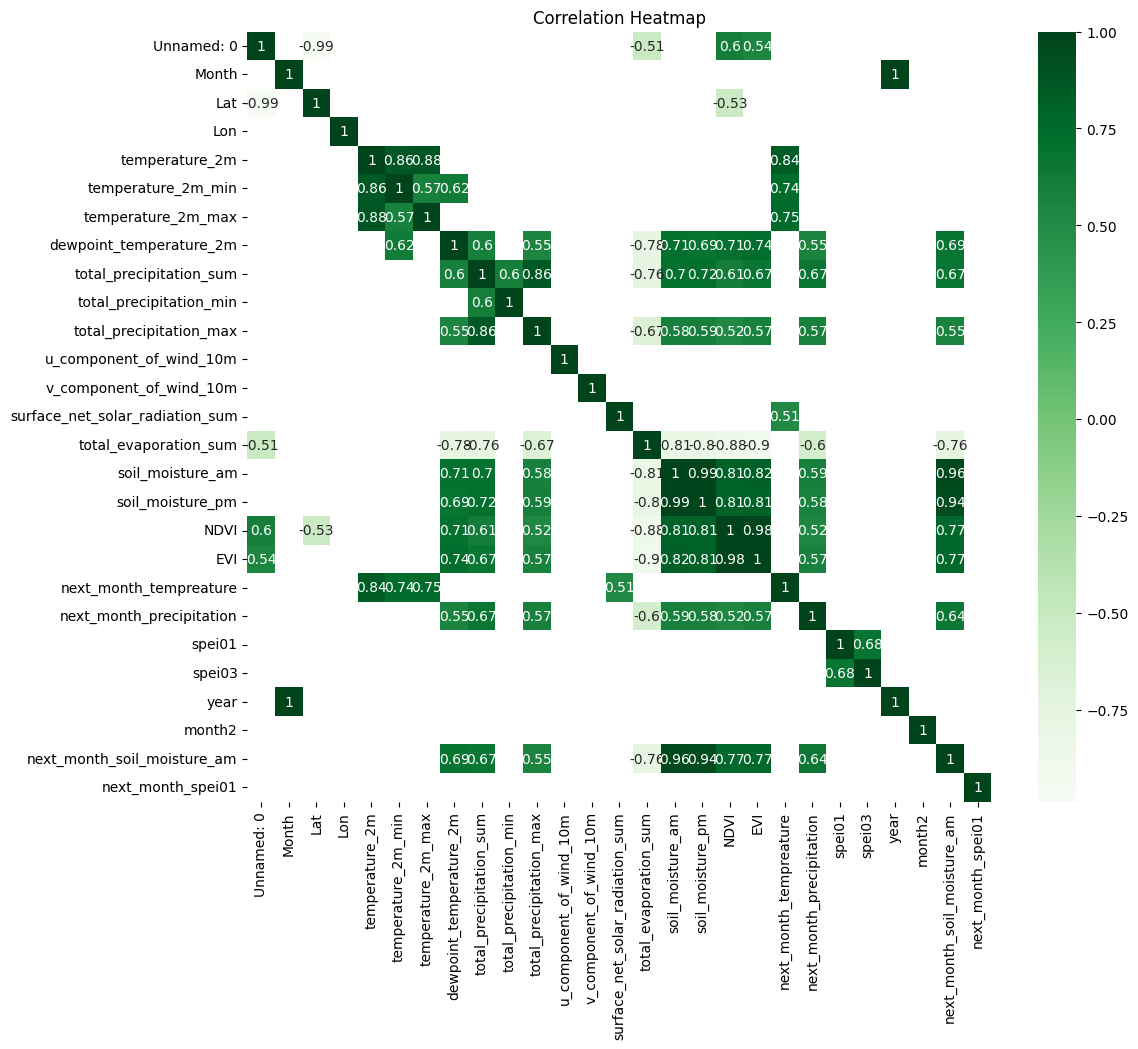

In [ ]:
correlation_matrix = dataset.corr()

filtered_correlations = correlation_matrix[(correlation_matrix <= -0.5) | (correlation_matrix >= 0.5)]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, annot=True, cmap='Greens', center=0)
plt.title("Correlation Heatmap")
plt.show()

- Longitude is moderately inversely correlated to NDVI
- Average temperature this month is strongly correlated to average temperature the following month
- Average temperature is strongly correlated to minimum and maximum temperature
- Dewpoint temperature is strongly correlated with NDVI, EVI, and soil moisture. It is moderately correlated with next month precipitation, past month precipitation, and past month temperature
- Total past month precipitation is strongly correlated with soil moisture, maximum precipitation, and dewpoint temperature
- NDVI and EVI are strongly correlated with soil moisture


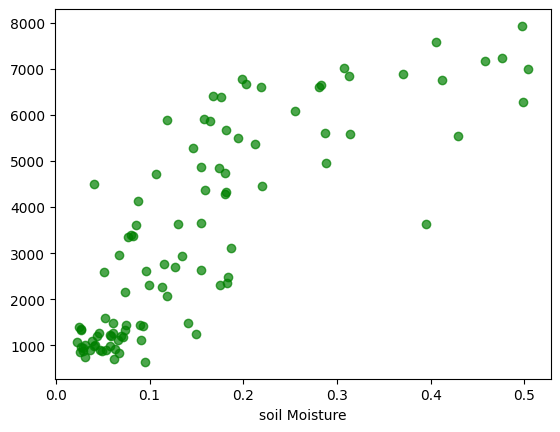

In [ ]:
import random

sample_df = dataset.sample(n=100, axis='rows')

soil_moisture = sample_df["soil_moisture_am"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(soil_moisture, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("soil Moisture")

plt.show()

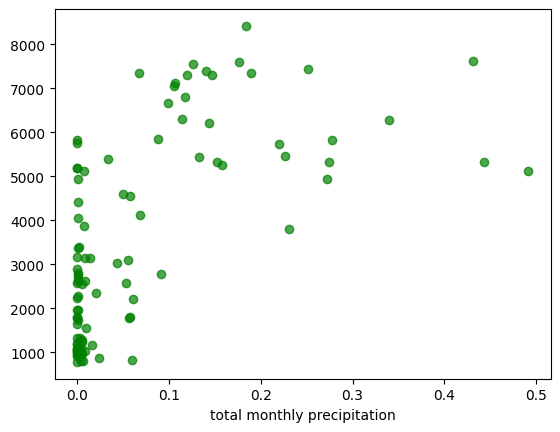

In [ ]:
sample_df = dataset.sample(n=100, axis='rows')

total_precipitation_sample = sample_df["total_precipitation_sum"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(total_precipitation_sample, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("total monthly precipitation")

plt.show()

<ipython-input-10-d8f96d5f0668>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


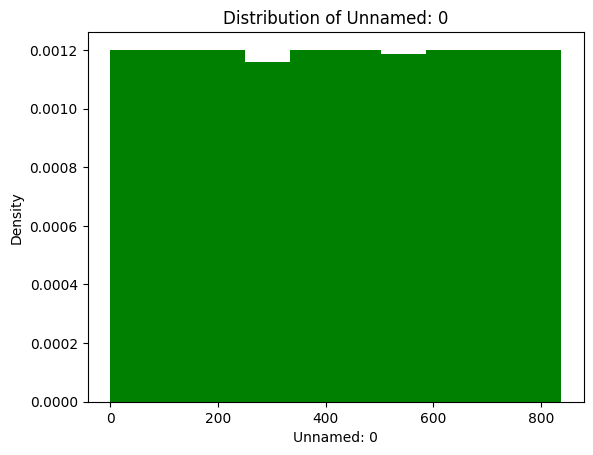

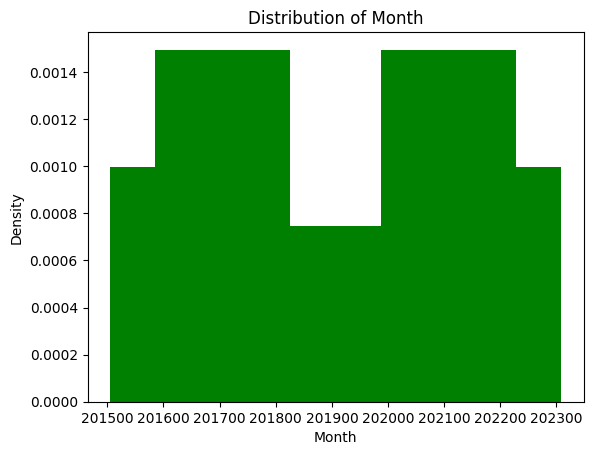

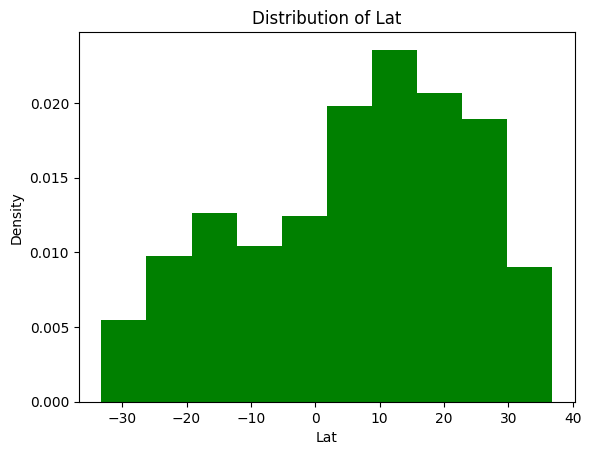

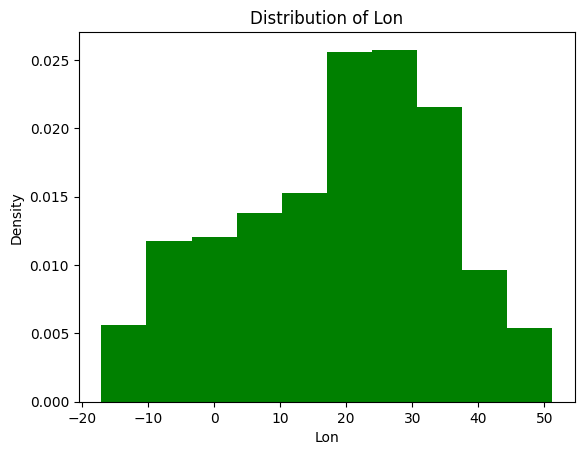

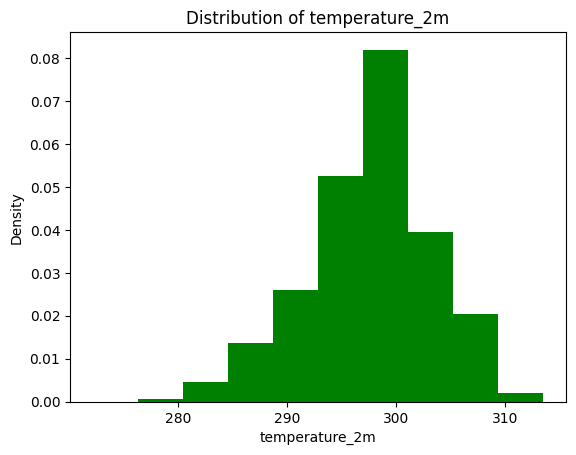

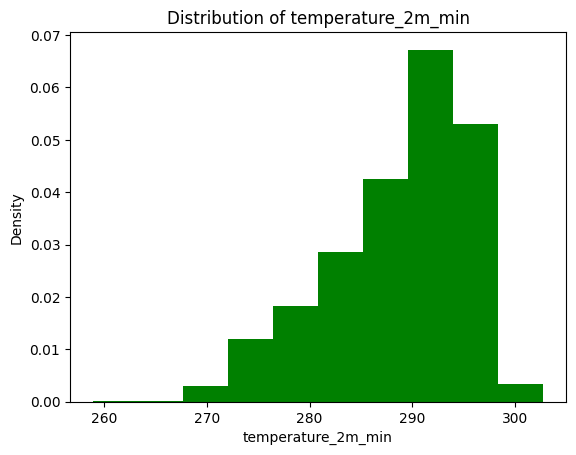

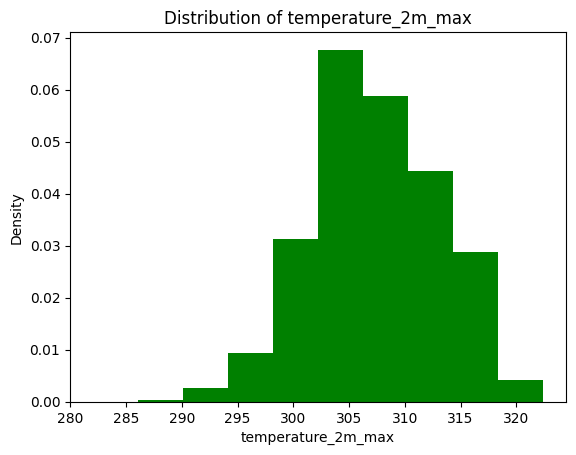

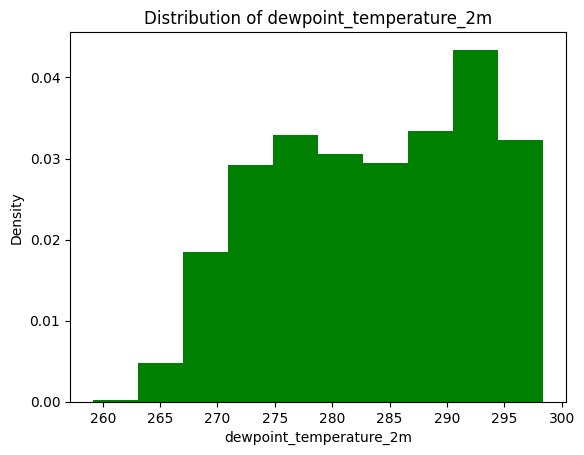

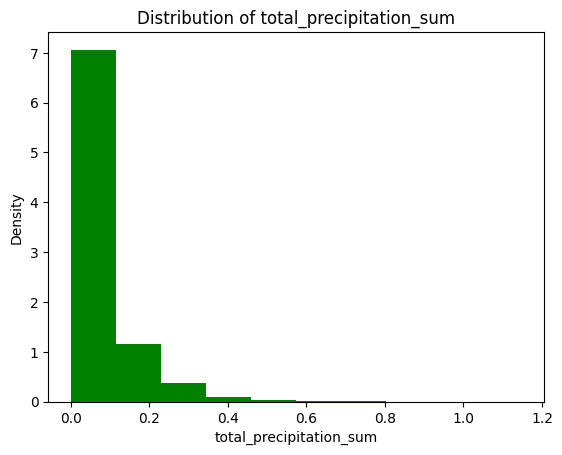

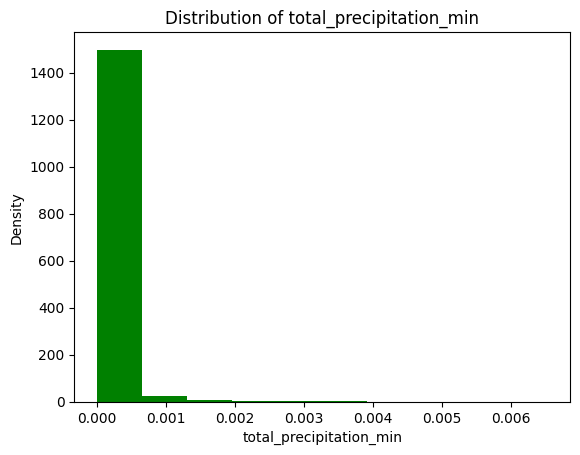

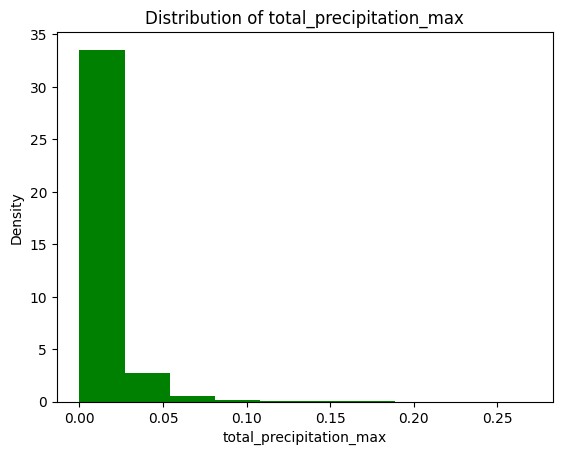

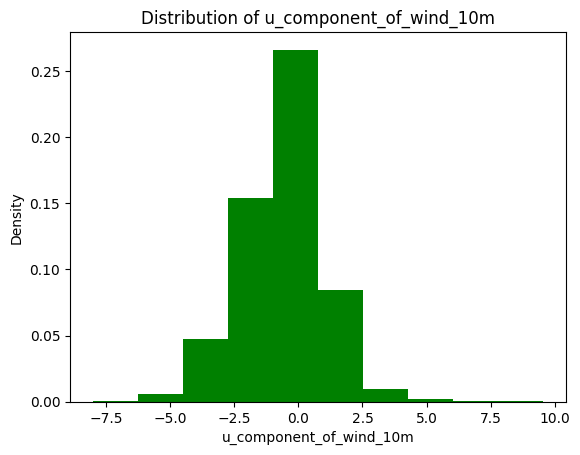

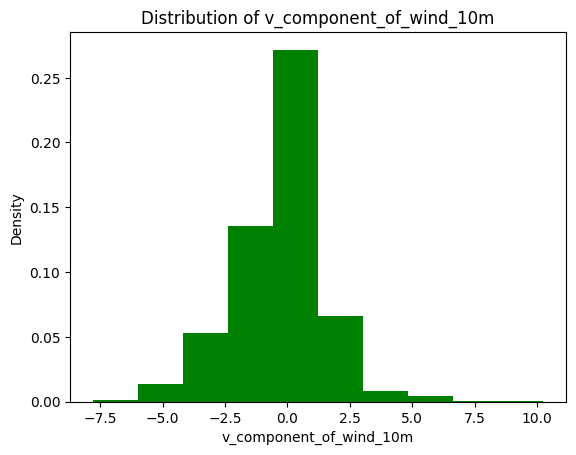

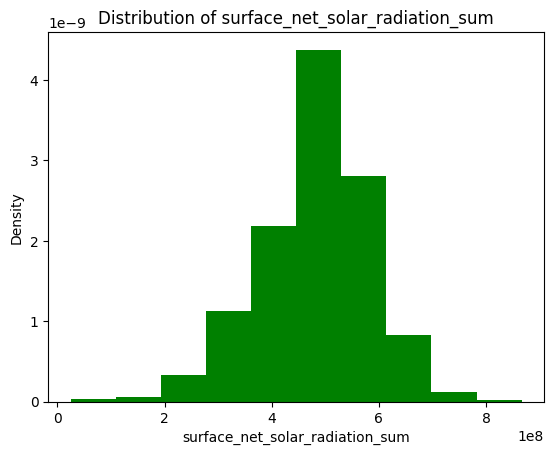

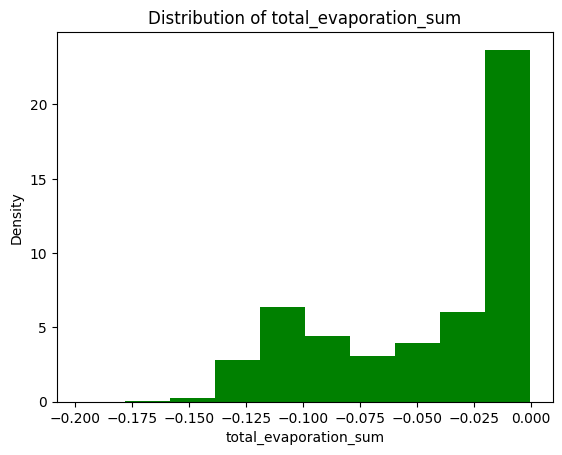

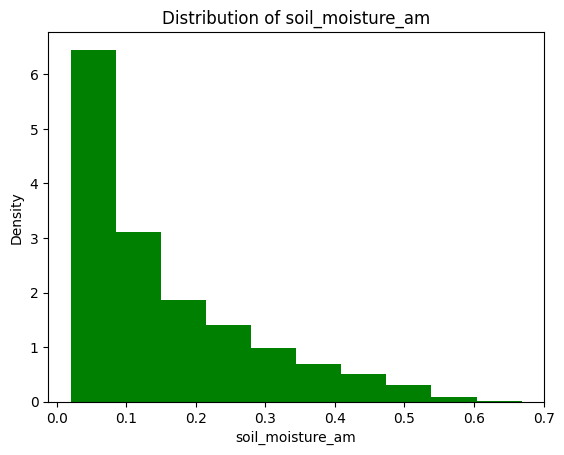

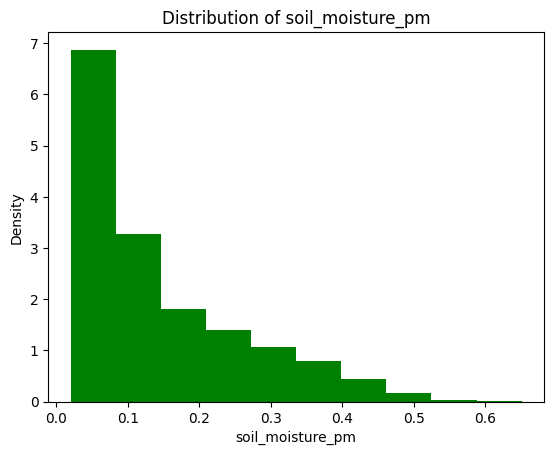

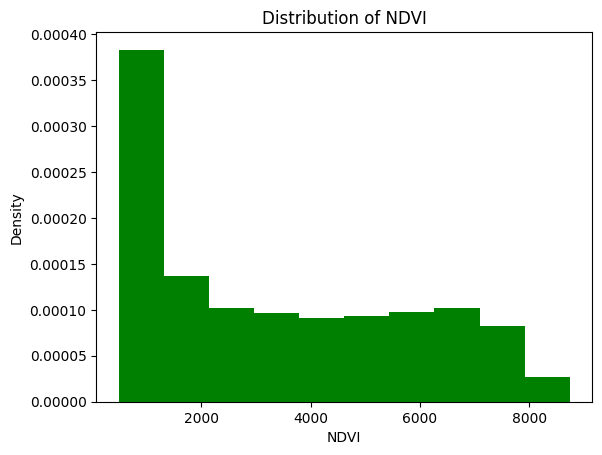

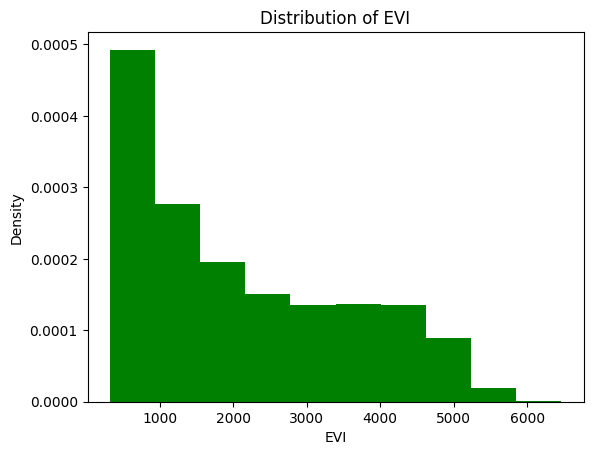

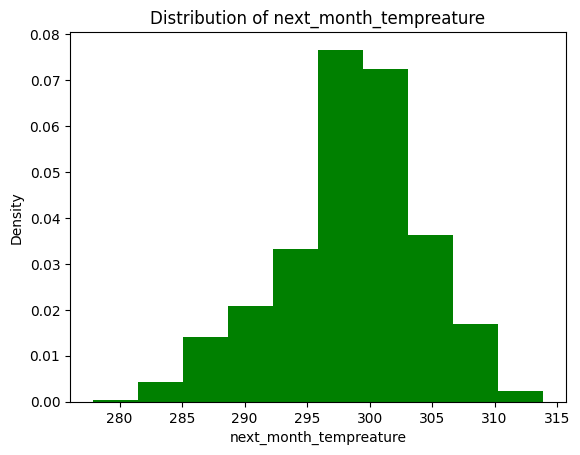

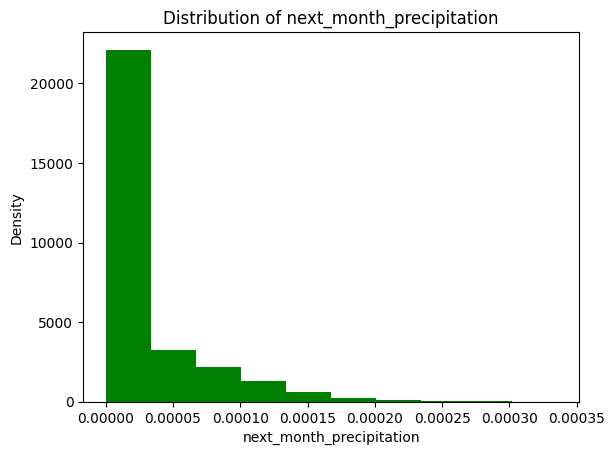

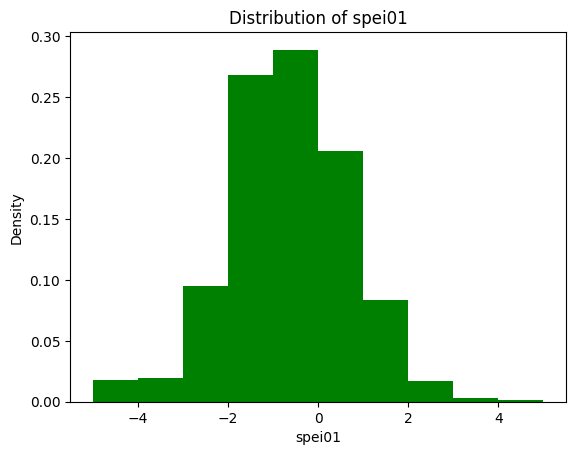

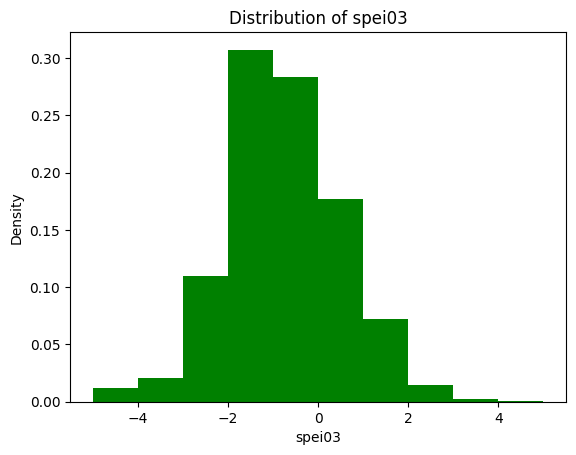

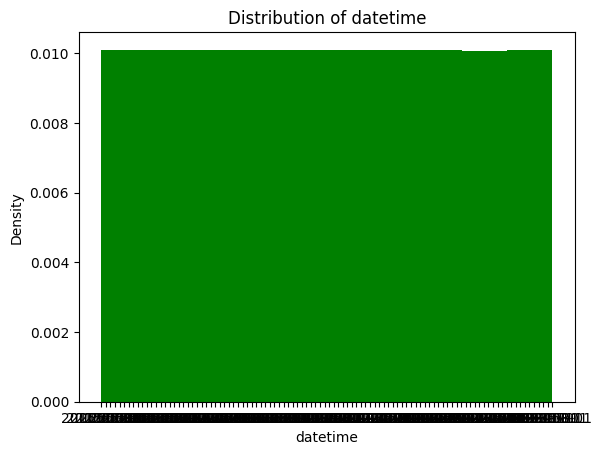

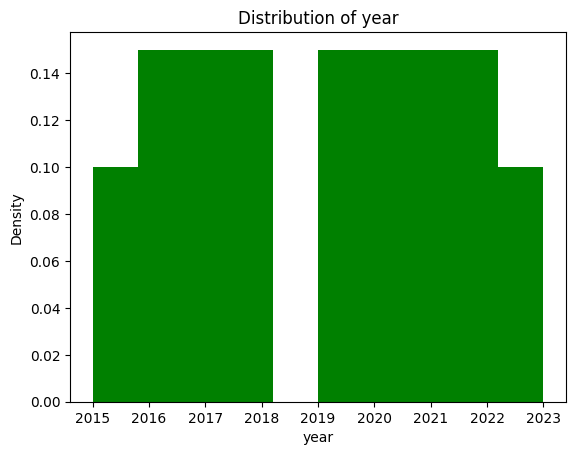

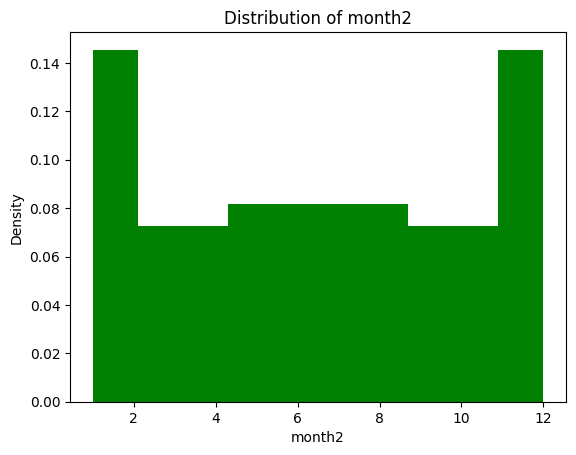

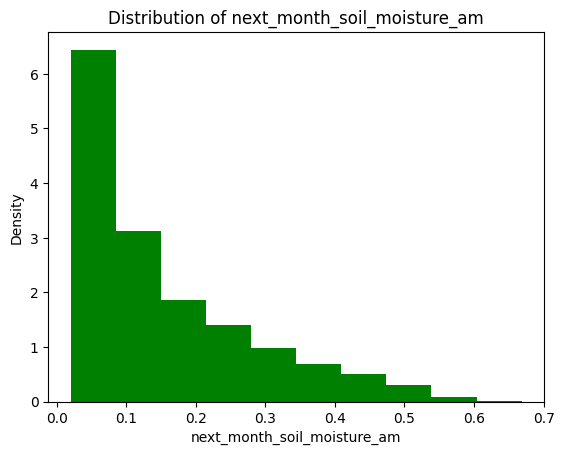

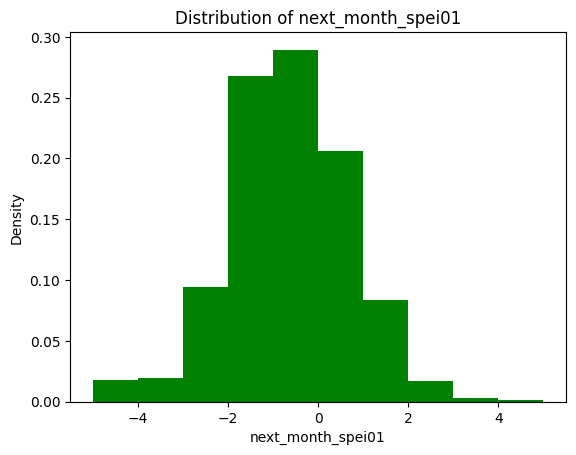

In [ ]:
column_list = dataset.columns.values.tolist()

for col_name in column_list:
    plt.figure()
    plt.hist(dataset[col_name], density = True, color = 'green')
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

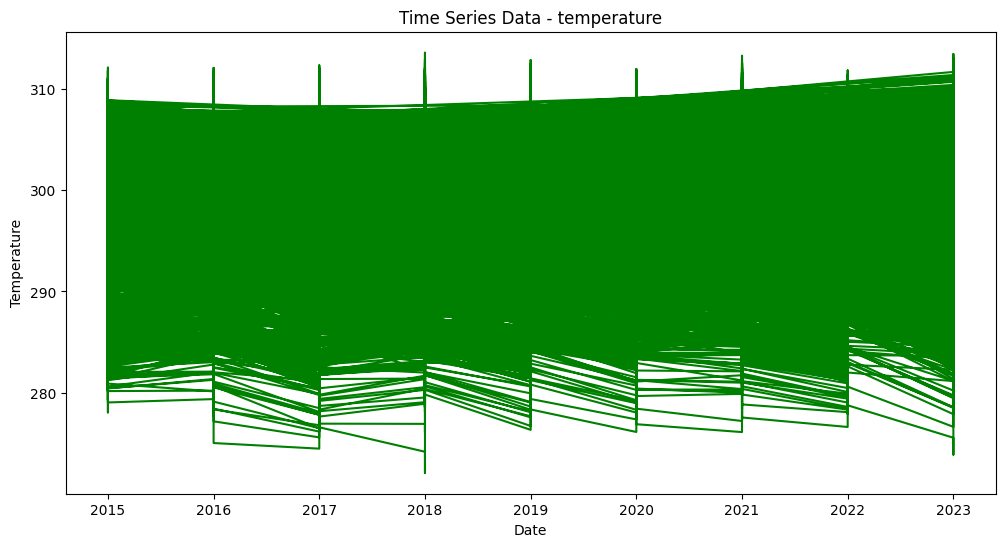

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['year'], dataset['temperature_2m'], color = 'green')
plt.title('Time Series Data - temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()
# how to agregate this for yearly sums?

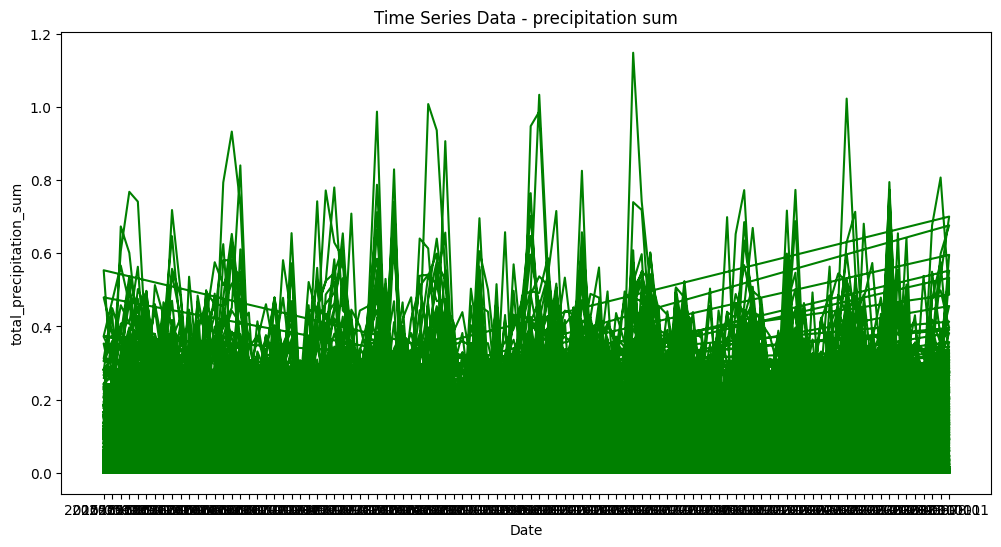

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation sum')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
dataset.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Month', 'Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'datetime', 'year', 'month2', 'next_month_soil_moisture_am'],
      dtype='object')

In [ ]:
dataset["datetime"]

0        2015-05-01
1        2015-06-01
2        2015-07-01
3        2015-08-01
4        2015-09-01
            ...    
83575    2023-04-01
83576    2023-05-01
83577    2023-06-01
83578    2023-07-01
83579    2023-08-01
Name: datetime, Length: 83580, dtype: object

In [ ]:
test_dataset = dataset[dataset['datetime'] == "2015-05-01"].merge(dataset[dataset['datetime'] == "2015-06-01"])

In [ ]:
test_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am


In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# Formatting the date for better readability
plt.plot(test_dataset['datetime'], test_dataset['spei01'], color='green', linewidth=2)

# Improving title and labels
plt.title('Time Series of SPEI Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('SPEI 1 month', fontsize=12)

# Adding gridlines
plt.grid(True)

# Rotating date labels for better visibility
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

NameError: name 'test_dataset' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# make a map of average SPEI in Africa, Max SPEI, min SPEI, or SPEI variability. Then, color code the categories of SPEI

In [ ]:
#make a map graph of SPEI at a particular datetime

In [ ]:
import seaborn as sns

In [ ]:
import plotly.express as px

new_dataframe = dataset[dataset['datetime'] == '2015-10-01']

fig = px.density_mapbox(new_dataframe, lat='Lat', lon='Lon', z='NDVI',
                        radius=20,
                        center=dict(lat=dataset['Lat'].mean(), lon=dataset['Lon'].mean()),
                        zoom=5,
                        mapbox_style='carto-positron')

fig.update_layout(title='Spatial Heatmap of SPEI01',
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

**Result Analysis**

In [4]:
file_path2 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname.csv'
df = pd.read_csv(file_path2)


,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,u_component_of_wind_10m,v_component_of_wind_10m,surface_net_solar_radiation_sum,total_evaporation_sum,...,soil_moisture_pm,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,Predicted,Actual,Actual_org,Country
0,202206.0,-33.238,18.865,0.0,0.526321,0.334201,0.424086,0.414068,0.278462,0.846060,...,0.353925,0.385227,0.234839,0.176332,0.083451,0.566873,0.378562,0.421736,0.421736,South Africa
1,202206.0,-33.238,20.661,0.0,0.552628,0.271991,0.494057,0.342901,0.300742,0.934387,...,0.190538,0.227904,0.114245,0.144980,0.045033,0.612132,0.478484,0.430036,0.430036,South Africa
2,202206.0,-33.238,22.458,0.0,0.578949,0.292366,0.462789,0.372334,0.302574,0.939701,...,0.209012,0.254745,0.134640,0.151744,0.031654,0.595937,0.367056,0.421511,0.421511,South Africa
3,202206.0,-33.238,24.255,0.0,0.605270,0.308521,0.549707,0.381113,0.295905,0.923007,...,0.240424,0.306344,0.176766,0.177053,0.027715,0.561766,0.534993,0.481171,0.481171,South Africa
4,202206.0,-33.238,26.051,0.0,0.631577,0.331718,0.508391,0.350324,0.289753,0.832976,...,0.240287,0.562232,0.361496,0.252398,0.028670,0.497300,0.541196,0.511543,0.511543,South Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12427,202308.0,36.831,2.695,1.0,0.289474,0.667945,0.431734,0.385679,0.760588,0.840780,...,0.071876,0.225883,0.171166,0.621888,0.130777,0.199253,0.418129,0.390657,0.390657,Algeria
12428,202308.0,36.831,4.492,1.0,0.315796,0.647545,0.411435,0.401167,0.754279,0.800069,...,0.172593,0.233407,0.183406,0.610772,0.091340,0.238931,0.494217,0.322575,0.322575,Algeria
12429,202308.0,36.831,6.288,1.0,0.342102,0.653019,0.443791,0.403215,0.752205,0.754564,...,0.192416,0.256068,0.221102,0.603232,0.081882,0.234256,0.303449,0.305495,0.305495,Algeria
12430,202308.0,36.831,8.085,1.0,0.368423,0.668234,0.454618,0.378565,0.736158,0.828297,...,0.147700,0.213075,0.192887,0.609275,0.068997,0.350369,0.271653,0.282792,0.282792,Algeria


**Calculate Absoluate SPEI Difference between Actual and Predicted**

In [5]:
df['AE'] = (df['Predicted'] - df['Actual']).abs()
file_path3 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname_AE.csv'
df.to_csv(file_path3, index=False)

In [14]:
dfn = pd.read_csv(file_path3)
print(dfn)

          Month     Lat     Lon  Lat_nom   Lon_nom  temperature_2m  \
0      202206.0 -33.238  18.865      0.0  0.526321        0.334201   
1      202206.0 -33.238  20.661      0.0  0.552628        0.271991   
2      202206.0 -33.238  22.458      0.0  0.578949        0.292366   
3      202206.0 -33.238  24.255      0.0  0.605270        0.308521   
4      202206.0 -33.238  26.051      0.0  0.631577        0.331718   
...         ...     ...     ...      ...       ...             ...   
12427  202308.0  36.831   2.695      1.0  0.289474        0.667945   
12428  202308.0  36.831   4.492      1.0  0.315796        0.647545   
12429  202308.0  36.831   6.288      1.0  0.342102        0.653019   
12430  202308.0  36.831   8.085      1.0  0.368423        0.668234   
12431  202308.0  36.831   9.881      1.0  0.394730        0.682846   

       u_component_of_wind_10m  v_component_of_wind_10m  \
0                     0.424086                 0.414068   
1                     0.494057           

In [9]:
!pip install pandas seaborn matplotlib


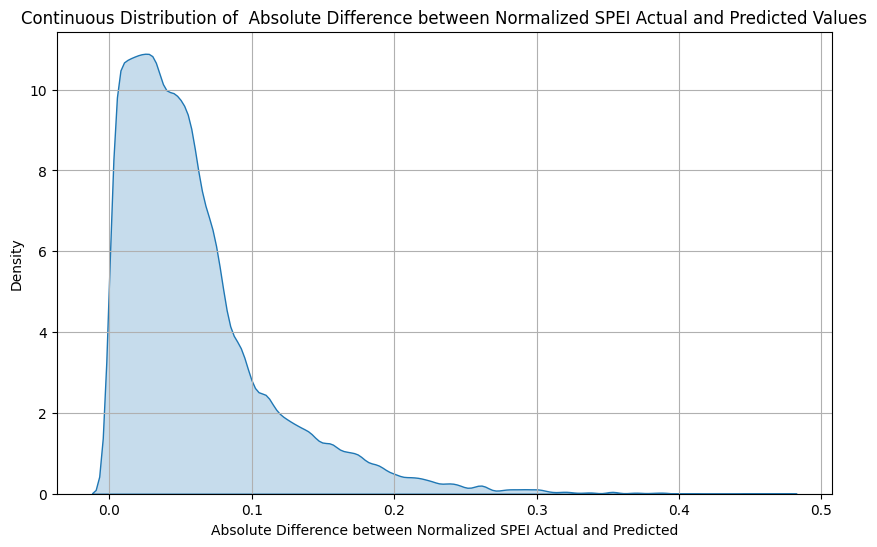

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_continuous_distribution(df):
    # Ensure your DataFrame has an 'AE' column for Absolute Error
    plt.figure(figsize=(10, 6))
    sns.kdeplot(dfn['AE'], bw_adjust=0.5, fill=True)
    plt.title('Continuous Distribution of  Absolute Difference between Normalized SPEI Actual and Predicted Values')
    plt.xlabel('Absolute Difference between Normalized SPEI Actual and Predicted')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

# Example DataFrame


# Plot the continuous distribution of AE values
plot_continuous_distribution(df)


**MAE by location**

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Example DataFrame with Lat, Lon, Country, Predicted, and Actual columns
# df = pd.DataFrame({'Lat': [lat_values], 'Lon': [lon_values], 'Country': [country_names], 'Predicted': [predicted_values], 'Actual': [actual_values]})
file_path2 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname_AE.csv'
df = pd.read_csv(file_path2)
df

,Month,Lat,Lon,Lat_nom,Lon_nom,temperature_2m,u_component_of_wind_10m,v_component_of_wind_10m,surface_net_solar_radiation_sum,total_evaporation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,Predicted,Actual,Actual_org,Country,AE
0,202206.0,-33.238,18.865,0.0,0.526321,0.334201,0.424086,0.414068,0.278462,0.846060,...,0.385227,0.234839,0.176332,0.083451,0.566873,0.378562,0.421736,0.421736,South Africa,0.043174
1,202206.0,-33.238,20.661,0.0,0.552628,0.271991,0.494057,0.342901,0.300742,0.934387,...,0.227904,0.114245,0.144980,0.045033,0.612132,0.478484,0.430036,0.430036,South Africa,0.048447
2,202206.0,-33.238,22.458,0.0,0.578949,0.292366,0.462789,0.372334,0.302574,0.939701,...,0.254745,0.134640,0.151744,0.031654,0.595937,0.367056,0.421511,0.421511,South Africa,0.054454
3,202206.0,-33.238,24.255,0.0,0.605270,0.308521,0.549707,0.381113,0.295905,0.923007,...,0.306344,0.176766,0.177053,0.027715,0.561766,0.534993,0.481171,0.481171,South Africa,0.053822
4,202206.0,-33.238,26.051,0.0,0.631577,0.331718,0.508391,0.350324,0.289753,0.832976,...,0.562232,0.361496,0.252398,0.028670,0.497300,0.541196,0.511543,0.511543,South Africa,0.029653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12427,202308.0,36.831,2.695,1.0,0.289474,0.667945,0.431734,0.385679,0.760588,0.840780,...,0.225883,0.171166,0.621888,0.130777,0.199253,0.418129,0.390657,0.390657,Algeria,0.027472
12428,202308.0,36.831,4.492,1.0,0.315796,0.647545,0.411435,0.401167,0.754279,0.800069,...,0.233407,0.183406,0.610772,0.091340,0.238931,0.494217,0.322575,0.322575,Algeria,0.171642
12429,202308.0,36.831,6.288,1.0,0.342102,0.653019,0.443791,0.403215,0.752205,0.754564,...,0.256068,0.221102,0.603232,0.081882,0.234256,0.303449,0.305495,0.305495,Algeria,0.002046
12430,202308.0,36.831,8.085,1.0,0.368423,0.668234,0.454618,0.378565,0.736158,0.828297,...,0.213075,0.192887,0.609275,0.068997,0.350369,0.271653,0.282792,0.282792,Algeria,0.011139


        Lat     Lon        AE
0   -33.238  18.865  0.085275
1   -33.238  20.661  0.089315
2   -33.238  22.458  0.039685
3   -33.238  24.255  0.054059
4   -33.238  26.051  0.065147
..      ...     ...       ...
831  36.831   2.695  0.040912
832  36.831   4.492  0.054177
833  36.831   6.288  0.056969
834  36.831   8.085  0.046461
835  36.831   9.881  0.073993

[836 rows x 3 columns]


<ipython-input-26-24fbaed52f73>:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


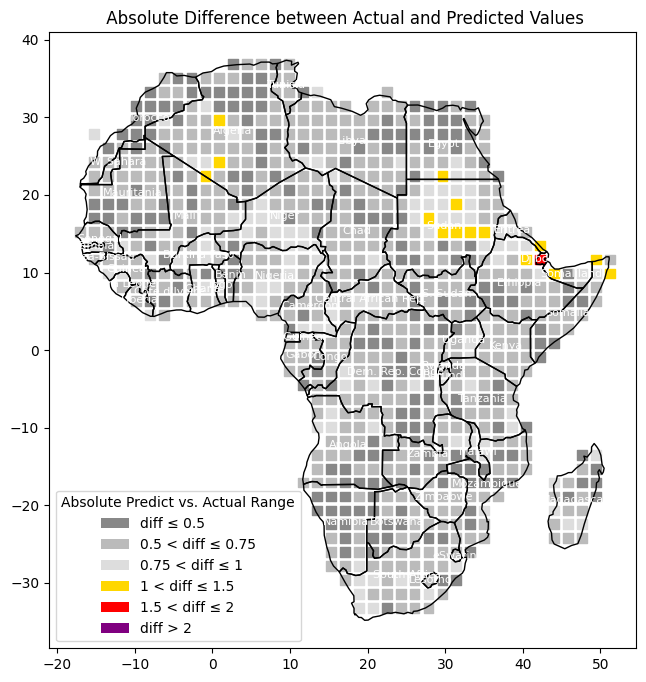

In [26]:

# Load the world map dataset with country borders



# Assuming df is your original DataFrame with columns: 'monthyear', 'lat', 'lon', 'AE'

# Group by 'lat' and 'lon' and calculate the mean of 'AE' for each group
df2 = df.groupby(['Lat', 'Lon'])['AE'].mean().reset_index()



print(df2)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df2, geometry=gpd.points_from_xy(df2['Lon'], df2['Lat']))

# Calculate the absolute difference between actual and predicted values
gdf['Absolute_Difference'] =  gdf['AE']

# Define colors based on the absolute difference values
difference_colors = []
for value in gdf['Absolute_Difference']:
    if value <= 0.05:
        difference_colors.append('#888888')  # Dark Green for absolute difference <= 0.05
    elif value <= 0.075:
        difference_colors.append('#BBBBBB')  # Yellow-Green for absolute difference <= 0.075
    elif value <= 0.1:
        difference_colors.append('#DDDDDD')  # Gold for absolute difference <= 0.1
    elif value <= 0.15:
        difference_colors.append('#FFD700')  # Red-Orange for absolute difference <= 0.15
    elif value <= 0.2:
        difference_colors.append('#FF0000')  # Dark Red for absolute difference <= 0.2
    else:
        difference_colors.append('#800080')  # Purple for absolute difference > 0.2

# Create a subplot for the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the filtered African map with country borders and country names
africa.boundary.plot(ax=ax, linewidth=1, color='black')
for idx, row in africa.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#FFFFFF')

# Plot the GeoDataFrame with the defined colors based on the absolute difference values
sc = gdf.plot(color=difference_colors, ax=ax, marker='s', markersize=50)

# Define legend labels and colors
legend_labels = {
    'diff ≤ 0.5': '#888888',  # Dark Green for absolute difference <= 0.05
    '0.5 < diff ≤ 0.75': '#BBBBBB',  # Yellow-Green for absolute difference <= 0.075
    '0.75 < diff ≤ 1': '#DDDDDD',  # Gold for absolute difference <= 0.1
    '1 < diff ≤ 1.5': '#FFD700',  # Red-Orange for absolute difference <= 0.15
    '1.5 < diff ≤ 2': '#FF0000',  # Dark Red for absolute difference <= 0.2
    'diff > 2': '#800080',  # Purple for absolute difference > 0.2
}

# Create a legend with color patches and labels
legend_elements = [Patch(facecolor=color, label=label) for label, color in legend_labels.items()]
legend = ax.legend(handles=legend_elements, title='Absolute Predict vs. Actual Range', loc='lower left')

# Set title
plt.title(' Absolute Difference between Actual and Predicted Values')

# Show the map
plt.show()


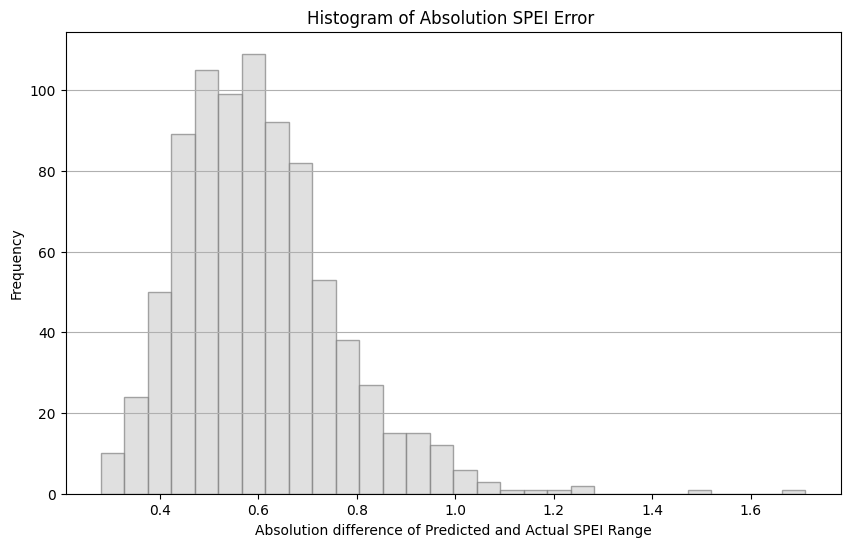

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_ae_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['AE'], bins=30, edgecolor='grey', alpha=0.7, color='lightgrey')
    plt.title('Histogram of Absolution SPEI Error ')
    plt.xlabel('Absolution difference of Predicted and Actual SPEI Range')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Example DataFrame

df_new = df2.copy()

# Multiply 'MeanAE' by 10
df_new['AE'] = df_new['AE'] * 10
# Plot the histogram of AE values
plot_ae_histogram(df_new)


**MAE by Spatial and Temporal**

      Country     Month        AE
0     Algeria  202206.0  0.039877
1     Algeria  202207.0  0.043630
2     Algeria  202208.0  0.060177
3     Algeria  202209.0  0.048713
4     Algeria  202210.0  0.056762
..        ...       ...       ...
750  Zimbabwe  202304.0  0.038787
751  Zimbabwe  202305.0  0.052165
752  Zimbabwe  202306.0  0.069861
753  Zimbabwe  202307.0  0.050467
754  Zimbabwe  202308.0  0.085297

[755 rows x 3 columns]


<ipython-input-42-bea53539192c>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MonthCat'] = pd.Categorical(df['Month']).codes


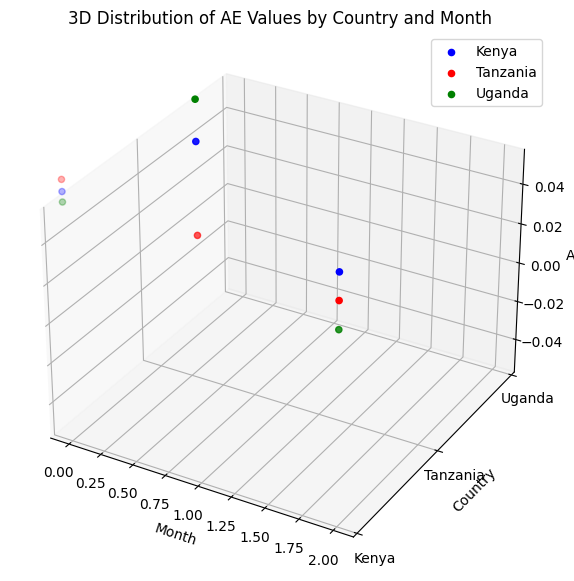

In [42]:

# Load the world map dataset with country borders



# Assuming df is your original DataFrame with columns: 'monthyear', 'lat', 'lon', 'AE'

# Group by 'lat' and 'lon' and calculate the mean of 'AE' for each group
df2 = df.groupby(['Country','Month'])['AE'].mean().reset_index()
odf2 = df2[((df2['Country'] == 'Kenya') | (df2['Country'] == 'Uganda') | (df2['Country'] == 'Tanzania')) & ((df2['Month'] == 202206) | (df2['Month'] == 202207) | (df2['Month'] == 202209))]

print(df2)
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_distribution_multicolor(df):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Assign colors to each country
    colors = {'Kenya': 'blue', 'Uganda': 'green', 'Tanzania': 'red'}

    # Ensure 'Month' is treated as categorical data for plotting
    df['MonthCat'] = pd.Categorical(df['Month']).codes

    # Loop through each country to plot
    for country in df['Country'].unique():
        # Filter the DataFrame by country
        df_country = df[df['Country'] == country]

        # Plotting
        ax.scatter(df_country['MonthCat'], df_country['AE'], zs=0, zdir='y', s=20, c=colors[country], label=country, depthshade=True)

    # Set labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Country')
    ax.set_zlabel('AE')

    # Customizing the y-ticks to show country names instead of numerical values
    ax.set_yticks(range(len(df['Country'].unique())))
    ax.set_yticklabels(df['Country'].unique())

    plt.title('3D Distribution of AE Values by Country and Month')
    plt.legend()
    plt.show()

# Assuming odf2 is already defined and filtered as per your previous instruction
plot_3d_distribution_multicolor(odf2)









In [13]:
df.describe()

,Predicted,Actual,AE
count,10.000000,10.000000,10.000000
mean,2.280000,2.310000,0.190000
std,1.247932,1.358471,0.073786
min,0.500000,0.200000,0.100000
25%,1.350000,1.250000,0.125000
50%,2.250000,2.400000,0.200000
75%,3.025000,3.300000,0.200000
max,4.600000,4.500000,0.300000


<ipython-input-3-8720fdcebe7f>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


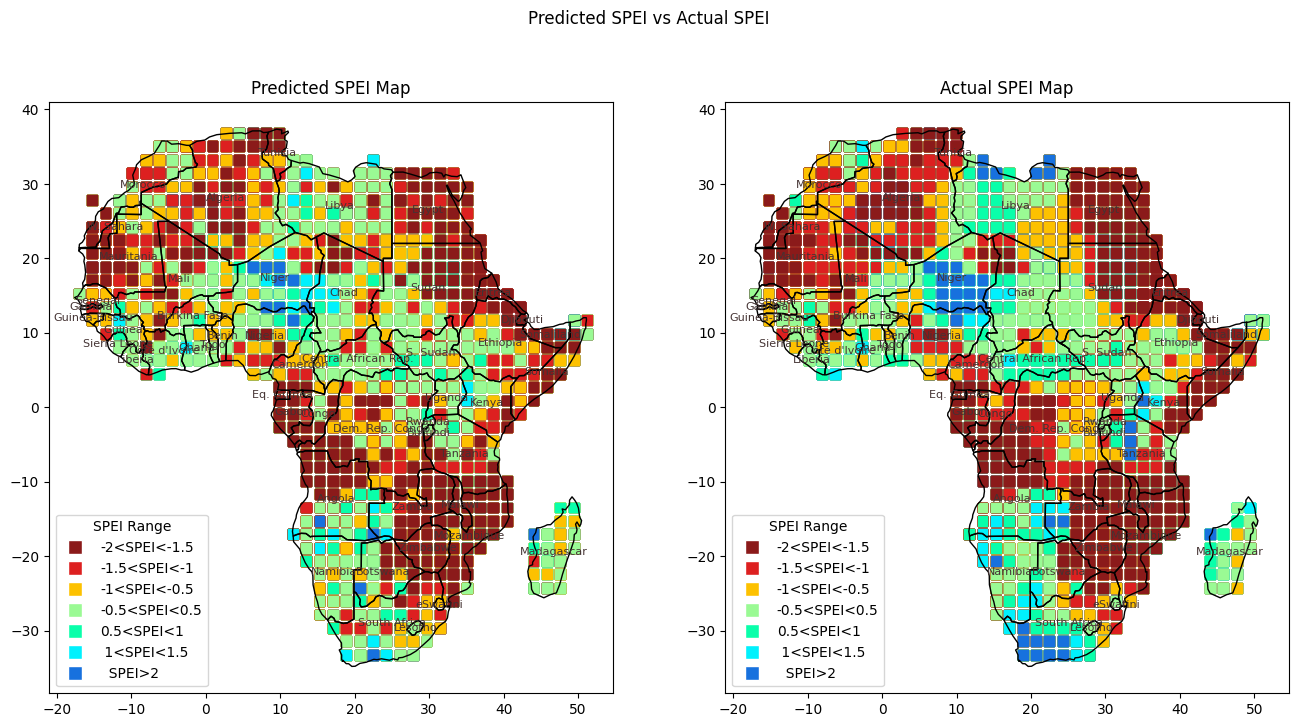

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with Lat, Lon, Country, Predicted, and Actual columns
# df = pd.DataFrame({'Lat': [lat_values], 'Lon': [lon_values], 'Country': [country_names], 'Predicted': [predicted_values], 'Actual': [actual_values]})
file_path2 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname.csv'
df = pd.read_csv(file_path2)
# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lon'], df['Lat']))

# Define colors based on predicted values
predicted_colors = []
for value in df['Predicted']:
    if value <= 0.35:
        predicted_colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        predicted_colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        predicted_colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        predicted_colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        predicted_colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        predicted_colors.append('#00F1FD')  # Orange
    elif value <= 1:
        predicted_colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value)
        predicted_colors.append('#FF0000')  # Dark Red (fallback)

# Define colors based on actual values
actual_colors = []
for value in df['Actual']:
    if value <= 0.35:
        actual_colors.append('#8B1A1A')  # Dark Red
    elif value <= 0.4:
        actual_colors.append('#DD2020')  # Red-Orange
    elif value <= 0.45:
        actual_colors.append('#FDC100')  # Dark Orange
    elif value <= 0.55:
        actual_colors.append('#9AFA94')  # Gold
    elif value <= 0.6:
        actual_colors.append('#09FFAA')  # Yellow
    elif value <= 0.65:
        actual_colors.append('#00F1FD')  # Orange
    elif value <= 1:
        actual_colors.append('#1771DE')  # Dark Orange
    else:
        print("value is", value)
        actual_colors.append('#FF0000')  # Dark Red (fallback)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot the filtered African map with country borders and country names for both subplots
for ax in axs:
    africa.boundary.plot(ax=ax, linewidth=1, color='black')
    for idx, row in africa.iterrows():
        ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#443333')

# Plot the GeoDataFrame with the defined colors based on predicted values and actual values
gdf.plot(color=predicted_colors, ax=axs[0], marker='s', markersize=50, legend=True, legend_kwds={'label': "Predicted SPEI"})
gdf.plot(color=actual_colors, ax=axs[1], marker='s', markersize=50, legend=True, legend_kwds={'label': "Actual SPEI"})


 # Create a legend for the colors and their corresponding values
legend_labels = {
    '#8B1A1A': 'SPEI<-2',
    '#8B1A1A': '-2<SPEI<-1.5',
    '#DD2020': '-1.5<SPEI<-1',
    '#FDC100': '-1<SPEI<-0.5',
    '#9AFA94': '-0.5<SPEI<0.5',
    '#09FFAA': '0.5<SPEI<1',
    '#00F1FD': ' 1<SPEI<1.5',
    '#1771DE': ' 1.5<SPEI<2',
    '#1771DE': '  SPEI>2',
}
handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10, label=label)
           for color, label in legend_labels.items()]

# Add the legend to the plot
axs[0].legend(handles=handles, title="SPEI Range")
axs[1].legend(handles=handles, title="SPEI Range")

# Set titles for subplots
axs[0].set_title('Predicted SPEI Map')
axs[1].set_title('Actual SPEI Map')

# Add an overall title
plt.suptitle("Predicted SPEI vs Actual SPEI")

# Show the plot
plt.show()

<ipython-input-20-5f9fd31e7b3c>:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


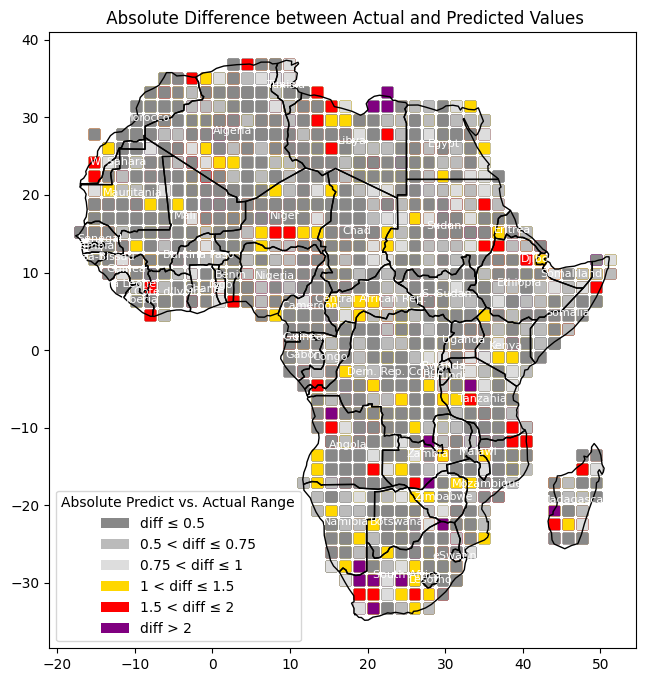

In [20]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Example DataFrame with Lat, Lon, Country, Predicted, and Actual columns
# df = pd.DataFrame({'Lat': [lat_values], 'Lon': [lon_values], 'Country': [country_names], 'Predicted': [predicted_values], 'Actual': [actual_values]})
file_path2 = '/content/drive/MyDrive/DroughtCastAI/GNNTestRunresult2_with_countryname.csv'
df = pd.read_csv(file_path2)
# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Create a GeoDataFrame from the DataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lon'], df['Lat']))

# Calculate the absolute difference between actual and predicted values
gdf['Absolute_Difference'] = abs(gdf['Actual'] - gdf['Predicted'])

# Define colors based on the absolute difference values
difference_colors = []
for value in gdf['Absolute_Difference']:
    if value <= 0.05:
        difference_colors.append('#888888')  # Dark Green for absolute difference <= 0.05
    elif value <= 0.075:
        difference_colors.append('#BBBBBB')  # Yellow-Green for absolute difference <= 0.075
    elif value <= 0.1:
        difference_colors.append('#DDDDDD')  # Gold for absolute difference <= 0.1
    elif value <= 0.15:
        difference_colors.append('#FFD700')  # Red-Orange for absolute difference <= 0.15
    elif value <= 0.2:
        difference_colors.append('#FF0000')  # Dark Red for absolute difference <= 0.2
    else:
        difference_colors.append('#800080')  # Purple for absolute difference > 0.2

# Create a subplot for the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the filtered African map with country borders and country names
africa.boundary.plot(ax=ax, linewidth=1, color='black')
for idx, row in africa.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#FFFFFF')

# Plot the GeoDataFrame with the defined colors based on the absolute difference values
sc = gdf.plot(color=difference_colors, ax=ax, marker='s', markersize=50)

# Define legend labels and colors
legend_labels = {
    'diff ≤ 0.5': '#888888',  # Dark Green for absolute difference <= 0.05
    '0.5 < diff ≤ 0.75': '#BBBBBB',  # Yellow-Green for absolute difference <= 0.075
    '0.75 < diff ≤ 1': '#DDDDDD',  # Gold for absolute difference <= 0.1
    '1 < diff ≤ 1.5': '#FFD700',  # Red-Orange for absolute difference <= 0.15
    '1.5 < diff ≤ 2': '#FF0000',  # Dark Red for absolute difference <= 0.2
    'diff > 2': '#800080',  # Purple for absolute difference > 0.2
}

# Create a legend with color patches and labels
legend_elements = [Patch(facecolor=color, label=label) for label, color in legend_labels.items()]
legend = ax.legend(handles=legend_elements, title='Absolute Predict vs. Actual Range', loc='lower left')

# Set title
plt.title(' Absolute Difference between Actual and Predicted Values')

# Show the map
plt.show()


<ipython-input-21-66416ffea895>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


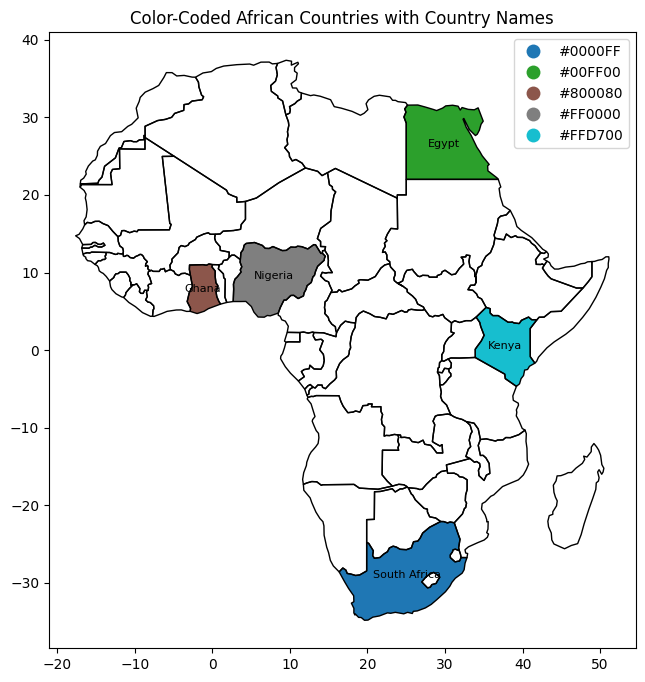

In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map dataset with country borders
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']

# Sample DataFrame with African country names and associated solid colors
data = {
    'Country': ['Nigeria', 'Egypt', 'South Africa', 'Kenya', 'Ghana'],
    'Color': ['#FF0000', '#00FF00', '#0000FF', '#FFD700', '#800080']
}

sample_df = pd.DataFrame(data)

# Merge the GeoDataFrame with the sample DataFrame based on country names
africa_with_colors = africa.merge(sample_df, left_on='name', right_on='Country')

# Create a subplot for the map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the African map with country boundaries and fill colors
africa.boundary.plot(ax=ax, linewidth=1, color='black')
africa_with_colors.plot(column='Color', ax=ax, legend=True)

# Add country names within the country boundaries
for idx, row in africa_with_colors.iterrows():
    ax.text(row['geometry'].centroid.x, row['geometry'].centroid.y, row['name'], fontsize=8, ha='center', va='center', color='#000000')

# Set title
plt.title('Color-Coded African Countries with Country Names')

# Show the map
plt.show()
